In [6]:
import pandas as pd
import numpy as np



In [22]:
data = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/Data/Titanic-Dataset.csv')
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA
EDA for k-NN is mainly about the preparation of the dataset to get the most out of the model since k-NN is sensitive to the quality of input data. It starts with understanding the dataset through basic summaries, identification of missing values, and distribution of features. Since k-NN uses distance metrics, scaling of features is very necessary for all features to contribute equally to the model, using either StandardScaler or MinMaxScaler. Visualizations include pair plots and scatter plots, which are useful for visualizing patterns, relationships, and class separability in the data. The outlier check and checking of class imbalance ensures that the model does not overfit or get biased toward certain dominant classes. Besides, in the case of PCA-like techniques, it might visualize the data in lower dimensions to understand some potential clustering or overlap between classes. By evaluating various values of k for accuracy, the EDA supports optimal tuning of hyperparameters and lays down the bedrock for a reliable implementation of k-NN.


In [23]:
print("\nData Types:")
print(data.dtypes)







Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [24]:
# Check for missing values in each column.
print("\nMissing Values:")
print(data.isnull().sum())




Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
# Summary statistics for numerical columns.
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [47]:
#Taking the categorical data
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])

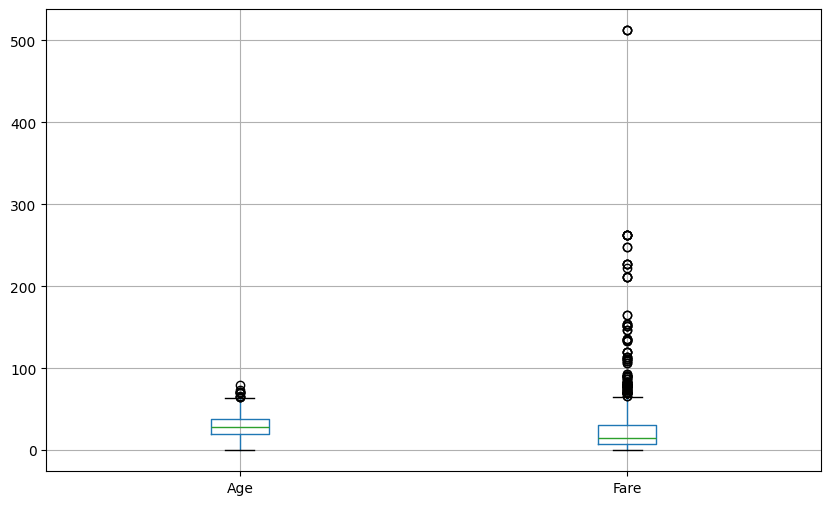

In [64]:
import seaborn as sns

# Build Box plots within appropriate columns

box_plots = data.boxplot(column=['Age', 'Fare'], figsize=(10, 6))

The box plot above has two columns Age and Fare. We can se that the minimum value in both the columns is 0 and the maximum value in age column is around 80 and fare column is around 90. Both the columns contain outliers in the data which suggests the use of median to make the data free of outliers.

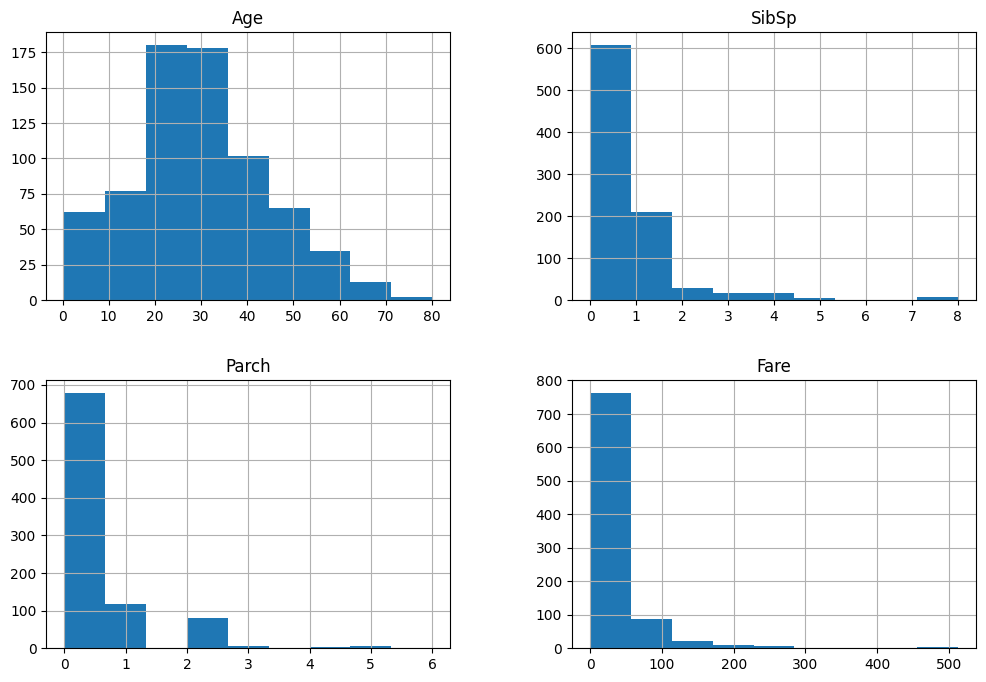

In [68]:
# Build Histograms  appropriate columns
histograms = data.drop(columns=['PassengerId','Survived','Pclass']).hist(bins=9, figsize=(12, 8))

The histogram above contains all the columns and the frequency. The age histogram clearly shows that the frequency of people between the age of 20 and 30 is the highest and lowest frequency is of the people between the age of 70-80. The fare column is as low as between 0 and 50 which has the highest frequency and can be as high as 500 which has 1 frequency.

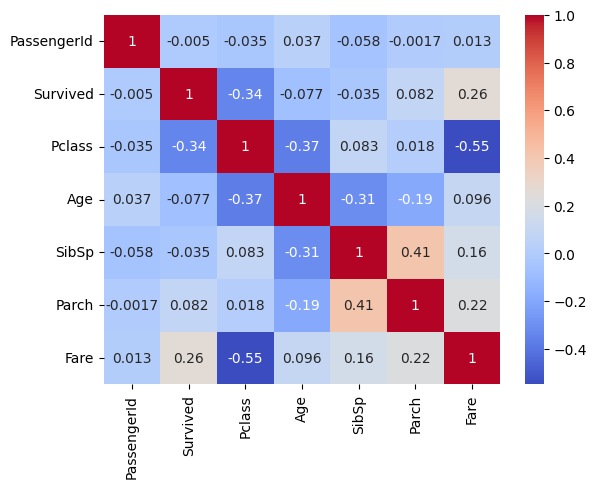

In [62]:
# Build Heatmaps for appropriate columns
heatmaps = sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

The heatmap above shows the correlation between the columns in the dataset the highest value is achieved by SibSp and Parch column and the lowest by Pclass and Fare column.

## Feature Selection

In [48]:
X = data.drop(columns=['Survived']).values
y = data['Survived'].values


In [49]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (624, 6)
Shape of X_test: (267, 6)
Shape of y_train: (624,)
Shape of y_test: (267,)


In [50]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")


    distance = np.sqrt(np.sum((point1-point2)**2))
    return distance


In [51]:
try:

    point1 = np.array([3, 4])
    point2 = np.array([0, 0])


    result = euclidean_distance(point1, point2)


    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


In [52]:
def knn_predict_single(query, X_train, y_train, k=13):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """

    distances = [euclidean_distance(query, x) for x in X_train]


    sorted_indices = np.argsort(distances)


    nearest_indices = sorted_indices[:k]


    nearest_labels = y_train[nearest_indices]


    prediction = np.bincount(nearest_labels).argmax()

    return prediction


In [53]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """

    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [54]:


try:

    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]


    predictions = knn_predict(X_test_sample, X_train , y_train , k=13)


    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)


    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [1 1 0 0 0]
Actual labels: [1 0 0 1 1]
Test case passed successfully!


In [55]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions/total_predictions)*100
    return accuracy



try:

    predictions = knn_predict(X_test, X_train, y_train, k=13)


    accuracy = compute_accuracy(y_test, predictions)


    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 58.80%


Accuracy for k=1: 54.31%
Accuracy for k=2: 59.93%
Accuracy for k=3: 58.80%
Accuracy for k=4: 65.17%
Accuracy for k=5: 61.42%
Accuracy for k=6: 61.80%
Accuracy for k=7: 60.67%
Accuracy for k=8: 64.79%
Accuracy for k=9: 63.30%
Accuracy for k=10: 63.67%
Accuracy for k=11: 60.67%
Accuracy for k=12: 66.67%
Accuracy for k=13: 67.79%
Accuracy for k=14: 67.42%
Accuracy for k=15: 66.29%
Accuracy for k=16: 65.92%
Accuracy for k=17: 66.29%
Accuracy for k=18: 66.67%
Accuracy for k=19: 66.67%
Accuracy for k=20: 66.29%


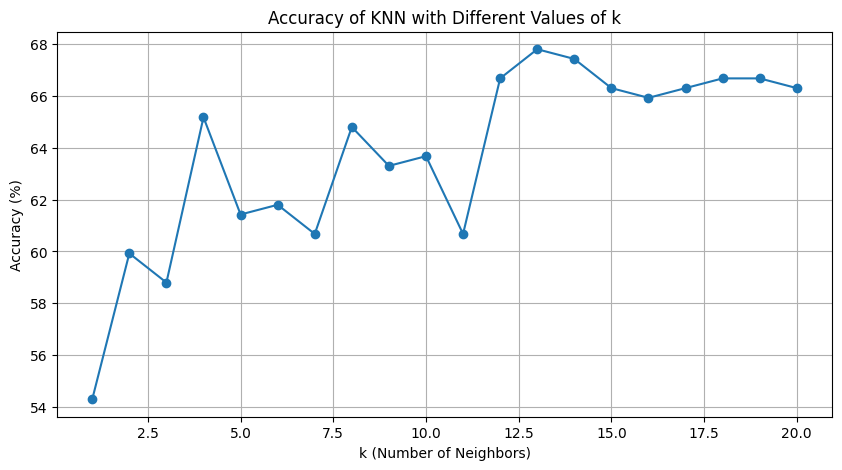

Experiment completed. Check the plot for the accuracy trend.


In [56]:
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:

        predictions =knn_predict(X_test,X_train,y_train,k=k)


        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")


    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


k_values = range(1, 21)


try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


From the scatter plot we can clearly observe that the highest accuray is around 67 when the value of k is around 13 and the lowest when the value of k is around 2